## 2-4. 데이터셋 만들기

[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%203/3.2_simple_linear_regression.ipynb)

In [1]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)


[1 2 3 4 5]
[ 5  8 11 14 17]


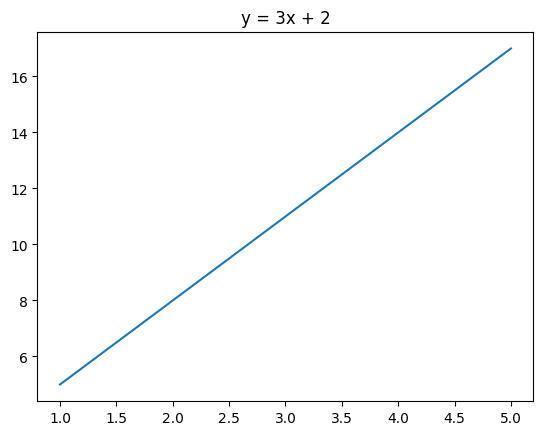

In [2]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

## 2-5-1. 모델 구조

In [3]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

In [4]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

## 2-5-2. 입력 데이터 형태

In [5]:
import tensorflow as tf 

model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150, 4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

## 2-5-3. 단순선형회귀 모델 생성

In [6]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

## 2-6. 모델 요약

In [7]:
# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 2-7. 컴파일

In [8]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_abolute_error'])

In [9]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [10]:
# 클래스 인스턴스 지정
model.compile(
              #optimizer=tf.keras.optimizers.SGD(lr=0.005), 
            optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),  # ← 수정됨
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

## 2-8. 훈련

In [11]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
model.fit(x, y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 262ms/step - loss: 66.6037 - mae: 7.7052
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 38.9532 - mae: 5.9360
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 22.8390 - mae: 4.5852
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 13.4474 - mae: 3.5538
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 7.9736 - mae: 2.7663


In [12]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 190ms/step - loss: 91.7315 - mae: 8.9925
Epoch 2/1200
1/1 [==============================] - 0s 3ms/step - loss: 53.5748 - mae: 6.9143
Epoch 3/1200
1/1 [==============================] - 0s 3ms/step - loss: 31.3382 - mae: 5.3277
Epoch 4/1200
1/1 [==============================] - 0s 3ms/step - loss: 18.3790 - mae: 4.1163
Epoch 5/1200
1/1 [==============================] - 0s 6ms/step - loss: 10.8262 - mae: 3.1914
Epoch 6/1200
1/1 [==============================] - 0s 4ms/step - loss: 6.4240 - mae: 2.4852
Epoch 7/1200
1/1 [==============================] - 0s 4ms/step - loss: 3.8579 - mae: 1.9459
Epoch 8/1200
1/1 [==============================] - 0s 5ms/step - loss: 2.3617 - mae: 1.5341
Epoch 9/1200
1/1 [==============================] - 0s 3ms/step - loss: 1.4890 - mae: 1.2195
Epoch 10/1200
1/1 [==============================] - 0s 4ms/step - loss: 0.9797 - mae: 0.9792
Epoch 11/1200
1/1 [==============================] - 0s 5ms/st

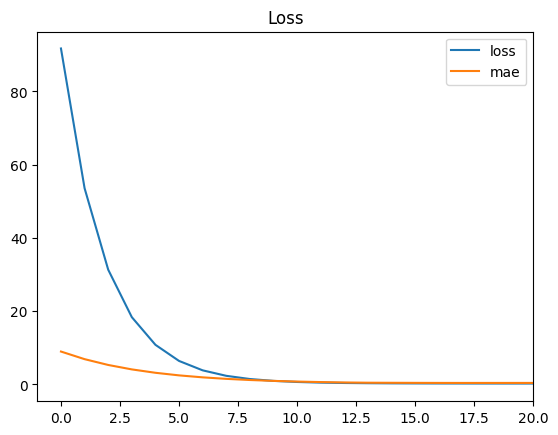

In [13]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

## 검증

In [14]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 95ms/step - loss: 8.5001e-05 - mae: 0.0079


[8.500057447236031e-05, 0.007913303561508656]

## 예측

In [15]:
# 예측
#model.predict([10])
#model.predict(tf.constant([[10.0]]))
model.predict(np.array([[10]]))

1/1 [==============================] - 0s 56ms/step


array([[32.038246]], dtype=float32)